In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_slsqp

In [3]:
from ppr.geometry import Rectangle

In [33]:
rec1 = Rectangle(1, 2, 3, 2, 0)
rec2 = Rectangle(-1, 5, 2, 4, np.pi/4)

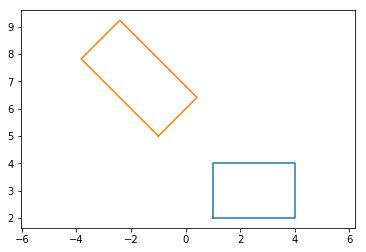

In [34]:
fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.axis('equal')
plt.show()

# General matrix formulation for polyhedra

In [35]:
# euclidean distance between two points
def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

# point in polyhedra if Ax <= b
def pol_eq(x, A, b):
    return A.dot(x) - b

def is_in_pol(x, A, b):
    return np.all(pol_eq(x, A, b) < 0)

In [36]:
# general representation of rectangles
A1, b1 = rec1.get_matrix_form()
A2, b2 = rec2.get_matrix_form()

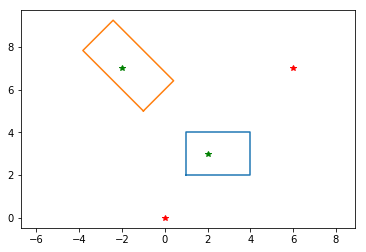

In [38]:
# check some points
some_points = np.array([[0, 0], [2, 3], [-2, 7], [6, 7]])

fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.axis('equal')
for p in some_points:
    if is_in_pol(p, A1, b1) or is_in_pol(p, A2, b2):
        ax.plot(p[0], p[1], 'g*')
    else:
        ax.plot(p[0], p[1], 'r*')
plt.show()

# Minumum distance problem formulation

Arrange two point x and y in one vector var = [x, y]

In [39]:
def obj(var):
    return dist(var[0:2], var[2:4])

def inequality_constraints(var):
    ie1 = pol_eq(var[0:2], A1, b1)
    ie2 = pol_eq(var[2:4], A2, b2)
    
    # fmin_slsqp wants g(x) >= 0 constraints
    return -np.hstack((ie1, ie2))

var_init = np.random.rand(4)

sol = fmin_slsqp(obj, var_init, f_ieqcons=inequality_constraints)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.121320343529712
            Iterations: 7
            Function evaluations: 42
            Gradient evaluations: 7


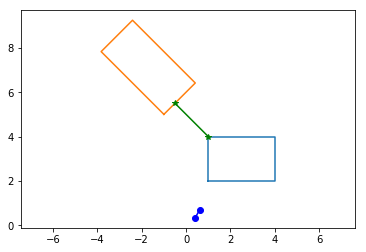

In [40]:
fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.plot(var_init[[0, 2]], var_init[[1, 3]], 'b-o')
ax.plot(sol[[0, 2]], sol[[1, 3]], 'g-*')
ax.axis('equal')
plt.show()

# Dual fromulation

In [41]:
def dual_obj(z):
    la = z[0:4]
    mu = z[4:8]
    return b1.dot(la) + b2.dot(mu)

def dual_eq_con(z):
    la = z[0:4]
    mu = z[4:8]
    return A1.T.dot(la) + A2.T.dot(mu)

def dual_ieq_con(z):
    la = z[0:4]
    return -np.sum((A1.T.dot(la))**2) + 1

bounds = [(0, None) for i in range(8)]

z_init = np.random.rand(8)
sol = fmin_slsqp(dual_obj, z_init, f_eqcons=dual_eq_con, f_ieqcons=dual_ieq_con, bounds=bounds)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.1213203447602362
            Iterations: 5
            Function evaluations: 50
            Gradient evaluations: 5


In [42]:
la = sol[0:4]
mu = sol[4:8]
z = A2.T.dot(mu)
c1 = -b1.dot(la)
c2 = b2.dot(mu)
print(z, c1, c2)

[ 0.70710678 -0.70710678] -2.12132034476 -4.24264068952


## separating hyperplane

In [45]:
# paramter form of hyperplane equations (==> straight line in 2D)
N = 30
t = np.linspace(-5, 5, N)
if abs(z[1]) > 0:
    plane1 = [t,  (c1 - z[0] * t) / z[1]]
    plane2 = [t,  (c2 - z[0] * t) / z[1]]
else:
    print("vertical lines")

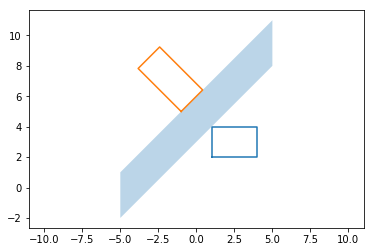

In [49]:
fig, ax = plt.subplots()
rec1.plot(ax)
rec2.plot(ax)
ax.fill_between(plane1[0], plane1[1], plane2[1], alpha=0.3)
ax.axis('equal')
plt.show()